# Robot Moving and Sensing

# Robot Class

In this project, we'll are localizing a robot in a 2D grid world. The basis for simultaneous localization and mapping (SLAM) is to gather information from a robot's sensors and motions over time, and then use information about measurements and motion to re-construct a map of the world.

### Uncertainty

Robot motion and sensors have some uncertainty associated with them. For example, imagine a car driving up hill and down hill; the speedometer reading will likely overestimate the speed of the car going up hill and underestimate the speed of the car going down hill because it cannot perfectly account for gravity. Similarly, we cannot perfectly predict the *motion* of a robot. A robot is likely to slightly overshoot or undershoot a target location.

First, we create a robot and move it around a 2D grid world. Then, define a `sense` function for this robot that allows it to sense landmarks in a given world! 

---

Before we start analyzing robot motion, let's load in our resources and define the `robot` class. This class initializes the robot's position and adds measures of uncertainty for motion.

In [1]:
# import some resources
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
# the robot class
class robot:

    # --------
    # init: 
    #   creates a robot with the specified parameters and initializes 
    #   the location (self.x, self.y) to the center of the world
    #
    def __init__(self, world_size = 100.0, measurement_range = 30.0,
                 motion_noise = 1.0, measurement_noise = 1.0):
        self.measurement_noise = 0.0
        self.world_size = world_size
        self.measurement_range = measurement_range
        self.x = world_size / 2.0
        self.y = world_size / 2.0
        self.motion_noise = motion_noise
        self.measurement_noise = measurement_noise
        self.landmarks = []
        self.num_landmarks = 0


    # returns a positive, random float
    def rand(self):
        return random.random() * 2.0 - 1.0


    # --------
    # move: attempts to move robot by dx, dy. If outside world
    #       boundary, then the move does nothing and instead returns failure
    #
    def move(self, dx, dy):

        x = self.x + dx + self.rand() * self.motion_noise
        y = self.y + dy + self.rand() * self.motion_noise

        if x < 0.0 or x > self.world_size or y < 0.0 or y > self.world_size:
            return False
        else:
            self.x = x
            self.y = y
            return True
    

    # --------
    # sense: returns x- and y- distances to landmarks within visibility range
    #        because not all landmarks may be in this range, the list of measurements
    #        is of variable length. Set measurement_range to -1 if you want all
    #        landmarks to be visible at all times
    #
    
    ## TODO: complete the sense function
    def sense(self):
        ''' This function does not take in any parameters, instead it references internal variables
            (such as self.landamrks) to measure the distance between the robot and any landmarks
            that the robot can see (that are within its measurement range).
            This function returns a list of landmark indices, and the measured distances (dx, dy)
            between the robot's position and said landmarks.
            This function should account for measurement_noise and measurement_range.
            One item in the returned list should be in the form: [landmark_index, dx, dy].
            '''
           
        measurements = []
        
        ## iterate through all of the landmarks in a world
        
        ## For each landmark
        ## 1. compute dx and dy, the distances between the robot and the landmark
        ## 2. account for measurement noise by *adding* a noise component to dx and dy
        ##    - The noise component should be a random value between [-1.0, 1.0)*measurement_noise
        ##    - Feel free to use the function self.rand() to help calculate this noise component
        ##    - It may help to reference the `move` function for noise calculation
        ## 3. If either of the distances, dx or dy, fall outside of the internal var, measurement_range
        ##    then we cannot record them; if they do fall in the range, then add them to the measurements list
        ##    as list.append([index, dx, dy]), this format is important for data creation done later
        
        ## TODO: return the final, complete list of measurements
        for landmark in self.landmarks:
            
            dx = landmark[0] - self.x + self.measurement_noise * self.rand()
            dy = landmark[1] - self.y + self.measurement_noise * self.rand()
            
            if abs(dx)< self.measurement_range and abs(dy) < self.measurement_range:
                measurements.append([self.landmarks.index(landmark), dx, dy])
                
        return measurements

    
    # --------
    # make_landmarks: 
    # make random landmarks located in the world
    #
    def make_landmarks(self, num_landmarks):
        self.landmarks = []
        for i in range(num_landmarks):
            self.landmarks.append([round(random.random() * self.world_size),
                                   round(random.random() * self.world_size)])
        self.num_landmarks = num_landmarks
    
    
    # called when print(robot) is called; prints the robot's location
    def __repr__(self):
        return 'Robot: [x=%.5f y=%.5f]'  % (self.x, self.y)

## Define a world and a robot

Next, let's instantiate a robot object. The robot class takes in a number of parameters including a world size and some values that indicate the sensing and movement capabilities of the robot.

Next , we define a small 10x10 square world, a measurement range that is half that of the world and small values for motion and measurement noise. These values will typically be about 10 times larger, but we want to demonstrate this behavior on a small scale. 

In [4]:
world_size         = 10.0    # size of world (square)
measurement_range  = 5.0     # range at which we can sense landmarks
motion_noise       = 0.2      # noise in robot motion
measurement_noise  = 0.2      # noise in the measurements

# instantiate a robot, r
r = robot(world_size, measurement_range, motion_noise, measurement_noise)

# print out the location of r
print(r)

Robot: [x=5.00000 y=5.00000]


## Visualizing the World

In the given example, we can see/print out that the robot is in the middle of the 10x10 world at (x, y) = (5.0, 5.0), which is exactly what we expect!

Robot: [x=5.00000 y=5.00000]


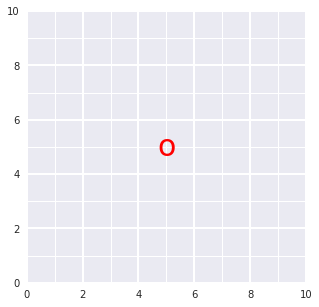

In [6]:
# import helper function
from helpers import display_world

# define figure size
plt.rcParams["figure.figsize"] = (5,5)

# call display_world and display the robot in it's grid world
print(r)
display_world(int(world_size), [r.x, r.y])

## Movement

Now you can really picture where the robot is in the world! Next, let's call the robot's `move` function. We'll ask it to move some distance `(dx, dy)` and we'll see that this motion is not perfect by the placement of our robot `o` and by the printed out position of `r`. 

Try changing the values of `dx` and `dy` and/or running this cell multiple times; see how the robot moves and how the uncertainty in robot motion accumulates over multiple movements.


Robot: [x=5.86805 y=7.07235]


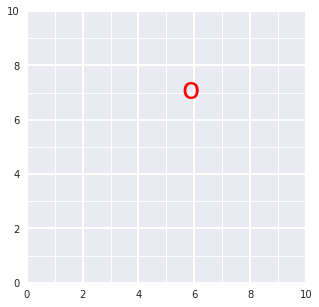

In [7]:
# choose values of dx and dy (negative works, too)
dx = 1
dy = 2
r.move(dx, dy)

# print out the exact location
print(r)

# display the world after movement, not that this is the same call as before
# the robot tracks its own movement
display_world(int(world_size), [r.x, r.y])

## Landmarks

Next, let's create landmarks, which are measurable features in the map. You can think of landmarks as things like notable buildings, or something smaller such as a tree, rock, or other feature.

The robot class has a function `make_landmarks` which randomly generates locations for the number of specified landmarks. Try changing `num_landmarks` or running this cell multiple times to see where these landmarks appear. We have to pass these locations as a third argument to the `display_world` function and the list of landmark locations is accessed similar to how we find the robot position `r.landmarks`. 

Each landmark is displayed as a purple `x` in the grid world, and we also print out the exact `[x, y]` locations of these landmarks at the end of this cell.

Robot: [x=5.86805 y=7.07235]


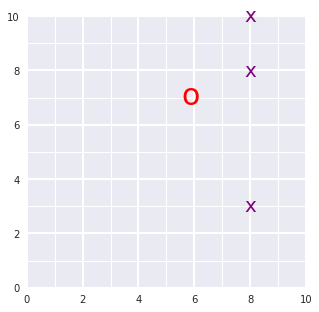

Landmark locations [x,y]:  [[8, 3], [8, 8], [8, 10]]


In [9]:
# create any number of landmarks
num_landmarks = 3
r.make_landmarks(num_landmarks)

# print out our robot's exact location
print(r)

# display the world including these landmarks
display_world(int(world_size), [r.x, r.y], r.landmarks)

# print the locations of the landmarks
print('Landmark locations [x,y]: ', r.landmarks)

## Sense

Once we have some landmarks to sense, we need to be able to tell our robot to *try* to sense how far they are away from it.

The `sense` function uses only internal class parameters and returns a list of the the measured/sensed x and y distances to the landmarks it senses within the specified `measurement_range`. 

The measurements have the format, `[i, dx, dy]` where `i` is the landmark index (0, 1, 2, ...) and `dx` and `dy` are the measured distance between the robot's location (x, y) and the landmark's location (x, y). This distance will not be perfect since our sense function has some associated `measurement noise`.

---

In the example in the following cell, we have a given our robot a range of `5.0` so any landmarks that are within that range of our robot's location, should appear in a list of measurements. Not all landmarks are guaranteed to be in our visibility range, so this list will be variable in length.

*Note: the robot's location is often called the **pose** or `[Pxi, Pyi]` and the landmark locations are often written as `[Lxi, Lyi]`.*

In [10]:
# try to sense any surrounding landmarks
measurements = r.sense()

# this will print out an empty list if `sense` has not been implemented
print(measurements)

[[0, 2.3009052290344223, -3.8786957878339625], [1, 2.0237275762299327, 0.9697753489277304], [2, 2.22792308925932, 2.916185220906598]]


---
## Data

#### Putting it all together

To perform SLAM, we'll collect a series of robot sensor measurements and motions, in that order, over a defined period of time. Then we'll use only this data to re-construct the map of the world with the robot and landmark locations. You can think of SLAM as peforming what we've done in this notebook, only backwards. Instead of defining a world and robot and creating movement and sensor data, it will be up to you to use movement and sensor measurements to reconstruct the world!

Next we see this list of movements and measurements (used to re-construct the world) listed in a structure called `data`. This is an array that holds sensor measurements and movements in a specific order, which will be useful to call upon when you have to extract this data and form constraint matrices and vectors.

`data` is constructed over a series of time steps as follows:

In [11]:
data = []

# after a robot first senses, then moves (one time step)
# that data is appended like so:
data.append([measurements, [dx, dy]])

# for our example movement and measurement
print(data)

[[[[0, 2.3009052290344223, -3.8786957878339625], [1, 2.0237275762299327, 0.9697753489277304], [2, 2.22792308925932, 2.916185220906598]], [1, 2]]]


In [12]:
# in this example, we have only created one time step (0)
time_step = 0

# so you can access robot measurements:
print('Measurements: ', data[time_step][0])

# and its motion for a given time step:
print('Motion: ', data[time_step][1])

Measurements:  [[0, 2.3009052290344223, -3.8786957878339625], [1, 2.0237275762299327, 0.9697753489277304], [2, 2.22792308925932, 2.916185220906598]]
Motion:  [1, 2]


# Omega and Xi, Constraints

## Omega and Xi

To implement Graph SLAM, a matrix and a vector (omega and xi, respectively) are introduced. The matrix is square and labelled with all the robot poses (xi) and all the landmarks (Li). Every time you make an observation, for example, as you move between two poses by some distance `dx` and can relate those two positions, you can represent this as a numerical relationship in these matrices.

It's easiest to see how these work in an example. Below you can see a matrix representation of omega and a vector representation of xi.

<img src='images/omega_xi.png' width=20% height=20% />

Next, let's look at a simple example that relates 3 poses to one another. 
* When you start out in the world most of these values are zeros or contain only values from the initial robot position
* In this example, you have been given constraints, which relate these poses to one another
* Constraints translate into matrix values

<img src='images/omega_xi_constraints.png' width=70% height=70% />

If you have ever solved linear systems of equations before, this may look familiar, and if not, let's keep going!

### Solving for x

To "solve" for all these x values, we can use linear algebra; all the values of x are in the vector `mu` which can be calculated as a product of the inverse of omega times xi.

<img src='images/solution.png' width=30% height=30% />

---
**You can confirm this result for yourself by executing the math in the cell below.**


In [ ]:
import numpy as np

# define omega and xi as in the example
omega = np.array([[1,0,0],
                  [-1,1,0],
                  [0,-1,1]])

xi = np.array([[-3],
               [5],
               [3]])

# calculate the inverse of omega
omega_inv = np.linalg.inv(np.matrix(omega))

# calculate the solution, mu
mu = omega_inv*xi

# print out the values of mu (x0, x1, x2)
print(mu)

## Motion Constraints and Landmarks

In the last example, the constraint equations, relating one pose to another were given to you. In this next example, let's look at how motion (and similarly, sensor measurements) can be used to create constraints and fill up the constraint matrices, omega and xi. Let's start with empty/zero matrices.

<img src='images/initial_constraints.png' width=35% height=35% />

This example also includes relationships between poses and landmarks. Say we move from x0 to x1 with a displacement `dx` of 5. Then we have created a motion constraint that relates x0 to x1, and we can start to fill up these matrices.

<img src='images/motion_constraint.png' width=50% height=50% />

In fact, the one constraint equation can be written in two ways. So, the motion constraint that relates x0 and x1 by the motion of 5 has affected the matrix, adding values for *all* elements that correspond to x0 and x1.

### 2D case

In these examples, we've been showing you change in only one dimension, the x-dimension. In the project, it will be up to you to represent x and y positional values in omega and xi. One solution could be to create an omega and xi that are 2x larger, so that they can hold both x and y values for poses. I might suggest drawing out a rough solution to graph slam as you read the instructions in the next notebook; that always helps me organize my thoughts. Good luck!

# Implement SLAM 

##  Overview

SLAM gives us a way to both localize a robot and build up a map of its environment as a robot moves and senses in real-time. This is an active area of research in the fields of robotics and autonomous systems. Since this localization and map-building relies on the visual sensing of landmarks, this is a computer vision problem. 

Using robot motion, representations of uncertainty in motion and sensing, and localization techniques, we define a function, `slam`, which takes in six parameters as input and returns the vector `mu`. 
> `mu` contains the (x,y) coordinate locations of the robot as it moves, and the positions of landmarks that it senses in the world

The vector, `mu`, should have (x, y) coordinates interlaced, for example, if there were 2 poses and 2 landmarks, `mu` will look like the following, where `P` is the robot position and `L` the landmark position:
```
mu =  matrix([[Px0],
              [Py0],
              [Px1],
              [Py1],
              [Lx0],
              [Ly0],
              [Lx1],
              [Ly1]])
```


## Generating an environment

In a real SLAM problem, you may be given a map that contains information about landmark locations, in this example, we will make our own data using the `make_data` function, which generates a world grid with landmarks in it and then generates data by placing a robot in that world and moving and sensing over some numer of time steps. The data is collected as an instantiated robot moves and senses in a world. The SLAM function will take in this data as input. 

---

## Create the world

Use the code below to generate a world of a specified size with randomly generated landmark locations. You can change these parameters and see how your implementation of SLAM responds! 

`data` holds the sensors measurements and motion of your robot over time. It stores the measurements as `data[i][0]` and the motion as `data[i][1]`.

In [13]:
import numpy as np
from helpers import make_data

# world parameters
num_landmarks      = 5        # number of landmarks
N                  = 20       # time steps
world_size         = 100.0    # size of world (square)

# robot parameters
measurement_range  = 50.0     # range at which we can sense landmarks
motion_noise       = 2.0      # noise in robot motion
measurement_noise  = 2.0      # noise in the measurements
distance           = 20.0     # distance by which robot (intends to) move each iteratation 


# make_data instantiates a robot, AND generates random landmarks for a given world size and number of landmarks
data = make_data(N, num_landmarks, world_size, measurement_range, motion_noise, measurement_noise, distance)

KeyboardInterrupt: 

### A note on `make_data`

The function above, `make_data`, takes in so many world and robot motion/sensor parameters because it is responsible for:
1. Instantiating a robot (using the robot class)
2. Creating a grid world with landmarks in it

**This function also prints out the true location of landmarks and the *final* robot location, to refer back to when testing the SLAM implementation.**

The `data` this returns is an array that holds information about **robot sensor measurements** and **robot motion** `(dx, dy)` that is collected over a number of time steps, `N`.


In `data` the measurement and motion data can be accessed from the first and second index in the columns of the data array. See the following code for an example, where `i` is the time step:
```
measurement = data[i][0]
motion = data[i][1]
```


In [ ]:
# print out some stats about the data
time_step = 0

print('Example measurements: \n', data[time_step][0])
print('\n')
print('Example motion: \n', data[time_step][1])

## Initialize Constraints

One of the most challenging tasks here will be to create and modify the constraint matrix and vector: omega and xi. 

<img src='images/motion_constraint.png' width=50% height=50% />


We are referring to robot poses as `Px, Py` and landmark positions as `Lx, Ly`, and one way to approach this challenge is to add *both* x and y locations in the constraint matrices.

<img src='images/constraints2D.png' width=50% height=50% />


Function `initialize_constraints` returns `omega` and `xi` constraints for the starting position of the robot.

In [ ]:
def initialize_constraints(N, num_landmarks, world_size):
    ''' This function takes in a number of time steps N, number of landmarks, and a world_size,
        and returns initialized constraint matrices, omega and xi.'''
    
    ## Recommended: Define and store the size (rows/cols) of the constraint matrix in a variable
    
    ## TODO: Define the constraint matrix, Omega, with two initial "strength" values
    ## for the initial x, y location of our robot
    rows = (N + int(num_landmarks))*2
    columns = (N +  int(num_landmarks))*2
    world_center = world_size / 2
    
    omega = np.zeros((rows, columns))
    omega[0, 0] = 1
    omega[1, 1] = 1
    
    ## TODO: Define the constraint *vector*, xi
    ## you can assume that the robot starts out in the middle of the world with 100% confidence
    xi = np.zeros((columns,1))
    xi[0] = world_center
    xi[1] = world_center
    
    return omega, xi

### Test as you go

It's good practice to test out your code, as you go. Since `slam` relies on creating and updating constraint matrices, `omega` and `xi` to account for robot sensor measurements and motion, let's check that they initialize as expected for any given parameters.

Below, you'll find some test code that allows you to visualize the results of your function `initialize_constraints`. We are using the [seaborn](https://seaborn.pydata.org/) library for visualization.

In [ ]:
# import data viz resources
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [ ]:
# define a small N and world_size (small for ease of visualization)
N_test = 5
num_landmarks_test = 2
small_world = 10

# initialize the constraints
initial_omega, initial_xi = initialize_constraints(N_test, num_landmarks_test, small_world)

In [ ]:
# define figure size
plt.rcParams["figure.figsize"] = (10,7)

# display omega
sns.heatmap(DataFrame(initial_omega), cmap='Blues', annot=True, linewidths=.5)

In [ ]:
# define  figure size
plt.rcParams["figure.figsize"] = (1,7)

# display xi
sns.heatmap(DataFrame(initial_xi), cmap='Oranges', annot=True, linewidths=.5)

---
## SLAM inputs 

In addition to `data`, the slam function will also take in:
* N -   The number of time steps that a robot will be moving and sensing
* num_landmarks - The number of landmarks in the world
* world_size - The size (w/h) of your world
* motion_noise - The noise associated with motion; the update confidence for motion should be `1.0/motion_noise`
* measurement_noise - The noise associated with measurement/sensing; the update weight for measurement should be `1.0/measurement_noise`

#### A note on noise

Recall that `omega` holds the relative "strengths" or weights for each position variable, and you can update these weights by accessing the correct index in omega `omega[row][col]` and *adding/subtracting* `1.0/noise` where `noise` is measurement or motion noise. `Xi` holds actual position values, and so to update `xi` you'll do a similar addition process only using the actual value of a motion or measurement. So for a vector index `xi[row][0]` you will end up adding/subtracting one measurement or motion divided by their respective `noise`.


#### Updating with motion and measurements

With a 2D omega and xi structure as shown above (in earlier cells), we have to be mindful about how we update the values in these constraint matrices to account for motion and measurement constraints in the x and y directions. Recall that the solution to these matrices (which holds all values for robot poses `P` and landmark locations `L`) is the vector, `mu`, which can be computed at the end of the construction of omega and xi as the inverse of omega times xi: $\mu = \Omega^{-1}\xi$

In [ ]:
def update_matrix(omega, xi, idx, idy, idx_i, idy_i, value_x, value_y, noise):
    inv_noise=1/noise
    
    xi[idx]+= value_x * inv_noise
    xi[idx_i]-= value_x * inv_noise
    
    xi[idy]+= value_y * inv_noise
    xi[idy_i]-= value_y * inv_noise
    
    omega[idx, idx] -= inv_noise
    omega[idx, idx_i] += inv_noise
    omega[idx_i, idx] += inv_noise
    omega[idx_i, idx_i] -= inv_noise
    
    omega[idy, idy] -= inv_noise
    omega[idy, idy_i] += inv_noise
    omega[idy_i, idy] += inv_noise
    omega[idy_i, idy_i] -= inv_noise
    return omega, xi

## slam takes in 6 arguments and returns mu, 
## mu is the entire path traversed by a robot (all x,y poses) *and* all landmarks locations
def slam(data, N, num_landmarks, world_size, motion_noise, measurement_noise):
    omega, xi = initialize_constraints(N, num_landmarks, world_size)
    for i in range(len(data)):
        measurement = data[i][0]
        motion = data[i][1]
        '''
        In Omega and Xi, we are storing x and y element as a consecutive elements 
        like x0, y0, x1, y1 ...., Lxn, Lyn and so on so we need to access it in that 
        way only, inorder to do measurement and motion update
        '''
        idx = i * 2
        idy = idx + 1
        for ind, mesu_x, mesu_y in measurement:
            # landmark index starts after 2*N in omega/xi  
            idx_1 = (N + ind)*2
            idy_1 = idx_1 + 1
            omega, xi=update_matrix(omega, xi, idx, idy, idx_1, idy_1, mesu_x, mesu_y, measurement_noise)
            
        mot_x, mot_y = motion
        idx_2 = (i + 1) * 2
        idy_2 = idx_2 + 1
        omega, xi=update_matrix(omega, xi, idx, idy, idx_2, idy_2, mot_x, mot_y, motion_noise)
    omega_inv = np.linalg.inv(omega)
    mu = np.dot(omega_inv, xi)
    
    return mu

In [ ]:
def get_poses_landmarks(mu, N):
    # create a list of poses
    poses = []
    for i in range(N):
        poses.append((mu[2*i].item(), mu[2*i+1].item()))

    # create a list of landmarks
    landmarks = []
    for i in range(num_landmarks):
        landmarks.append((mu[2*(N+i)].item(), mu[2*(N+i)+1].item()))

    # return completed lists
    return poses, landmarks


In [ ]:
def print_all(poses, landmarks):
    print('\n')
    print('Estimated Poses:')
    for i in range(len(poses)):
        print('['+', '.join('%.3f'%p for p in poses[i])+']')
    print('\n')
    print('Estimated Landmarks:')
    for i in range(len(landmarks)):
        print('['+', '.join('%.3f'%l for l in landmarks[i])+']')


## Run SLAM


#### Landmark Locations

Referring back to the printout of *exact* landmark locations when this data was created, we see values that are very similar to those coordinates, but not quite (since `slam` must account for noise in motion and measurement).

In [ ]:
# call your implementation of slam, passing in the necessary parameters
mu = slam(data, N, num_landmarks, world_size, motion_noise, measurement_noise)

# print out the resulting landmarks and poses
if(mu is not None):
    # get the lists of poses and landmarks
    # and print them out
    poses, landmarks = get_poses_landmarks(mu, N)
    print_all(poses, landmarks)

## Visualize the constructed world

Finally, using the `display_world` code from the `helpers.py` file we can actually visualize the final position of the robot and the positon of landmarks, created from only motion and measurement data

In [ ]:
# import the helper function
from helpers import display_world

# Display the final world!

# define figure size
plt.rcParams["figure.figsize"] = (20,20)

# check if poses has been created
if 'poses' in locals():
    # print out the last pose
    print('Last pose: ', poses[-1])
    # display the last position of the robot *and* the landmark positions
    display_world(int(world_size), poses[-1], landmarks)